## Final Project Start - Team 4 (McCullers)

In [7]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install textblob

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
import re
import string
from textblob import TextBlob
from wordcloud import WordCloud



### starting off looking at the data

In [5]:
universal = pd.read_csv('/Users/jackt/OneDrive/Desktop/USD/Class 6 Machine Learning/Module 7/universal_studio_branches.csv', encoding = 'UTF-8')

In [6]:
universal

,reviewer,rating,written_date,title,review_text,branch
0,Kelly B,2.0,"May 30, 2021",Universal is a complete Disaster - stick with ...,We went to Universal over Memorial Day weekend...,Universal Studios Florida
1,Jon,1.0,"May 30, 2021",Food is hard to get.,The food service is horrible. I’m not reviewin...,Universal Studios Florida
2,Nerdy P,2.0,"May 30, 2021",Disappointed,I booked this vacation mainly to ride Hagrid m...,Universal Studios Florida
3,ran101278,4.0,"May 29, 2021",My opinion,When a person tries the test seat for the ride...,Universal Studios Florida
4,tammies20132015,5.0,"May 28, 2021",The Bourne Stuntacular...MUST SEE,"Ok, I can't stress enough to anyone and everyo...",Universal Studios Florida
...,...,...,...,...,...,...
50899,vinz20,4.0,"March 29, 2010",I'll Be Back Only If ...,This is my first visit to a Universal Studio t...,Universal Studios Singapore
50900,betty l,4.0,"March 29, 2010",Universal Studios Singapore Experience,We finally visited Singapore's very first them...,Universal Studios Singapore
50901,spoonos65,4.0,"March 28, 2010",Impressive but not quite finished!,We visited during the first week of its 'soft ...,Universal Studios Singapore
50902,HeatSeekerWrexham_UK,4.0,"March 22, 2010",Small but beautifully marked,We visited on the 3rd day of the 'soft' openin...,Universal Studios Singapore


In [11]:
universal_df=universal

universal_df.isnull().sum()

reviewer        0
rating          0
written_date    0
title           0
review_text     0
branch          0
dtype: int64

In [12]:
universal_df.nunique()

reviewer        44086
rating              5
written_date     4276
title           37522
review_text     50847
branch              3
dtype: int64

In [13]:
universal_df.dtypes

reviewer         object
rating          float64
written_date     object
title            object
review_text      object
branch           object
dtype: object

In [14]:
universal_df['branch']=universal_df['branch'].astype('category')

In [15]:
universal_df.dtypes

reviewer          object
rating           float64
written_date      object
title             object
review_text       object
branch          category
dtype: object

In [16]:
# now to convert the written date to an actual date

universal_df['written_date'] = pd.to_datetime(universal_df['written_date'])


universal_df.dtypes # now we will be able to look at different time periods of our choosing

reviewer                object
rating                 float64
written_date    datetime64[ns]
title                   object
review_text             object
branch                category
dtype: object

In [17]:
universal_df_text = universal_df[['review_text', 'rating']]
corpus2= universal_df_text['review_text']
y= universal_df_text['rating']

In [18]:
print(corpus2.shape, y.shape)

(50904,) (50904,)


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

vectorizer

TfidfVectorizer()

In [20]:
X_matrix = vectorizer.fit_transform(corpus2)
X_matrix.shape

(50904, 42028)

In [21]:
import scipy.sparse

X =pd.DataFrame.sparse.from_spmatrix(X_matrix, columns = vectorizer.get_feature_names())

In [22]:
X

,00,000,0000hrs,000km,000plusy,000s,000y,000yen,00a,00am,...,難捨難離,非常欣賞,音の演出を堪能,音楽の効果もあるのか,頭上だったのですぐには気づかず,餐廳及小食,香港的兩大樂園都是慣例,馬上清潔腿步,１日楽しむことができました,２回乗ってみたものの
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

select_k = SelectKBest(chi2, k=10) # to get my top 10 features
select_X = select_k.fit_transform(X_train, y_train)
select_X.shape

(40723, 10)

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

X_train.columns[select_k.get_support()] 

Index(['amazing', 'customer', 'money', 'not', 'poor', 'refund', 'rude', 'told',
       'waste', 'worst'],
      dtype='object')

Text(0, 0.5, 'Accuracy')

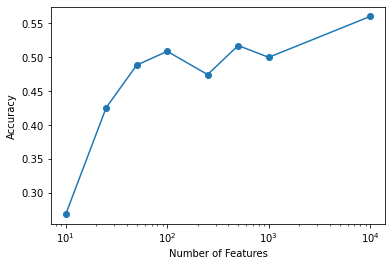

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron


acc=[]
k_vals = [10, 25, 50, 100, 250, 500, 1000, 10000]

for k in k_vals:
    sel = SelectKBest(chi2, k=k)
    X_train_new2 = sel.fit_transform(X_train, y_train)
    X_test_new2 = sel.transform(X_test)
    clf2 = Perceptron(eta0 = 0.1, random_state = 42)
    clf2.fit(X_train_new2, y_train)
    acc.append(clf2.score(X_test_new2, y_test))
    
plt.plot(k_vals, acc, '-o')
plt.xscale('log')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')

## WordCloud

In [1]:
from wordcloud import WordCloud, STOPWORDS

In [8]:
word_text = universal_df['review_text'].values
word_strings = "".join(word_text)

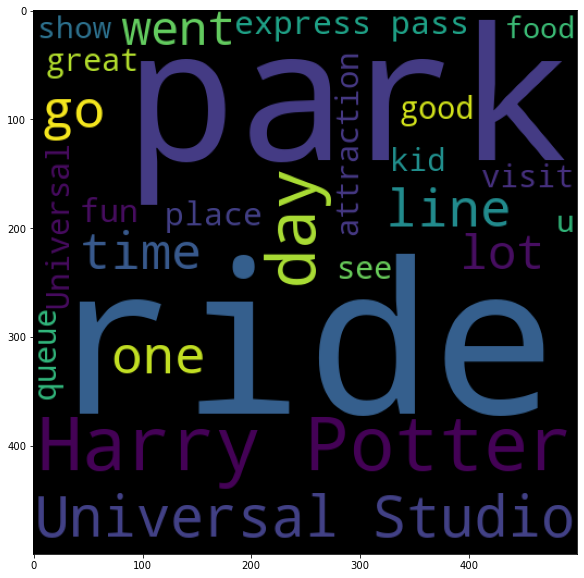

In [9]:
stopwords = set(STOPWORDS)
stopwords.add("SPAM_SPAM")

Universal_WordCloud= WordCloud(width = 500, height = 500, max_words =25, stopwords = stopwords).generate(word_strings)

plt.figure(figsize=(10,10))
plt.imshow(Universal_WordCloud)

## Sklearn NB Multi

[5. 4. 5. ... 5. 5. 5.]
              precision    recall  f1-score   support

         1.0       1.00      0.00      0.01       377
         2.0       0.00      0.00      0.00       412
         3.0       0.67      0.00      0.00      1022
         4.0       0.49      0.01      0.03      2762
         5.0       0.56      1.00      0.71      5608

    accuracy                           0.55     10181
   macro avg       0.54      0.20      0.15     10181
weighted avg       0.54      0.55      0.40     10181



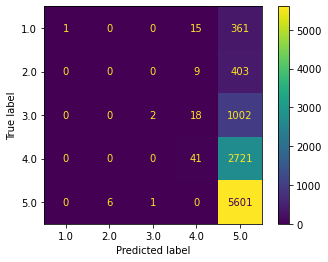

In [35]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()

clf.fit(X, y)

y_pred= clf.predict(X_test)

MultinomialNB()

print(clf.predict(X))

acc.append(clf.score(X_test, y_test))

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test)

Text(0, 0.5, 'Accuracy')

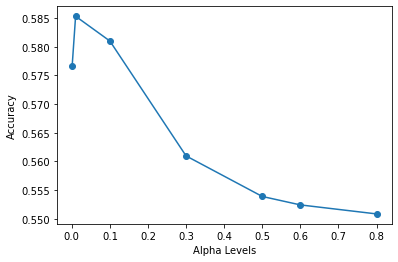

In [37]:
acc=[]
alphas = [0.8, 0.6, 0.5, 0.3, 0.1, 0.010, 0.0010]

for alpha in alphas:
    clf3 = MultinomialNB(alpha = alpha)
    clf3.fit(X_train, y_train)
    acc.append(clf3.score(X_test, y_test))


plt.plot(alphas, acc, '-o')
#plt.xscale('log')
plt.xlabel('Alpha Levels')
plt.ylabel('Accuracy')

## looking at just Universal Orlando Reviews

In [39]:
is_universal_orlando = universal_df['branch']=='Universal Studios Florida'
is_universal_orlando.head()

0    True
1    True
2    True
3    True
4    True
Name: branch, dtype: bool

In [41]:
universal_orlando =universal_df[is_universal_orlando]

universal_orlando.head()

,reviewer,rating,written_date,title,review_text,branch
0,Kelly B,2.0,2021-05-30,Universal is a complete Disaster - stick with ...,We went to Universal over Memorial Day weekend...,Universal Studios Florida
1,Jon,1.0,2021-05-30,Food is hard to get.,The food service is horrible. I’m not reviewin...,Universal Studios Florida
2,Nerdy P,2.0,2021-05-30,Disappointed,I booked this vacation mainly to ride Hagrid m...,Universal Studios Florida
3,ran101278,4.0,2021-05-29,My opinion,When a person tries the test seat for the ride...,Universal Studios Florida
4,tammies20132015,5.0,2021-05-28,The Bourne Stuntacular...MUST SEE,"Ok, I can't stress enough to anyone and everyo...",Universal Studios Florida


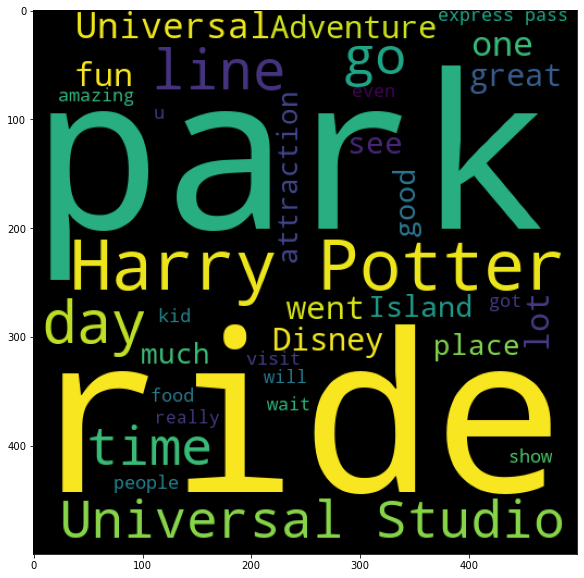

In [43]:
word_text = universal_orlando['review_text'].values
word_strings = "".join(word_text)

stopwords = set(STOPWORDS)
stopwords.add("SPAM_SPAM")

Universal_Orlando_WordCloud= WordCloud(width = 500, height = 500, max_words =35, stopwords = stopwords).generate(word_strings)

plt.figure(figsize=(10,10))
plt.imshow(Universal_Orlando_WordCloud)

Text(0, 0.5, 'Accuracy')

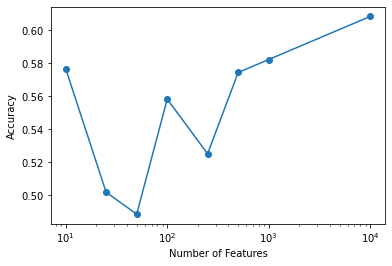

In [46]:
universal_orlando_text = universal_orlando[['review_text', 'rating']]
corpus3= universal_orlando_text['review_text']
y2= universal_orlando_text['rating']

vectorizer = TfidfVectorizer()

vectorizer

X_matrix2 = vectorizer.fit_transform(corpus3)
X_matrix2.shape

X2 =pd.DataFrame.sparse.from_spmatrix(X_matrix2, columns = vectorizer.get_feature_names())

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.20, random_state=42)

select_k = SelectKBest(chi2, k=10) # to get my top 10 features
select_X = select_k.fit_transform(X_train, y_train)
select_X.shape

X_train.columns[select_k.get_support()] 

acc=[]
k_vals = [10, 25, 50, 100, 250, 500, 1000, 10000]

for k in k_vals:
    sel = SelectKBest(chi2, k=k)
    X_train_new3 = sel.fit_transform(X_train, y_train)
    X_test_new3 = sel.transform(X_test)
    clf4 = Perceptron(eta0 = 0.1, random_state = 42)
    clf4.fit(X_train_new3, y_train)
    acc.append(clf4.score(X_test_new3, y_test))
    
plt.plot(k_vals, acc, '-o')
plt.xscale('log')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')

              precision    recall  f1-score   support

         1.0       0.52      0.30      0.38       270
         2.0       0.30      0.09      0.14       259
         3.0       0.31      0.13      0.18       571
         4.0       0.31      0.15      0.20      1393
         5.0       0.67      0.92      0.78      3632

    accuracy                           0.61      6125
   macro avg       0.42      0.32      0.34      6125
weighted avg       0.54      0.61      0.55      6125



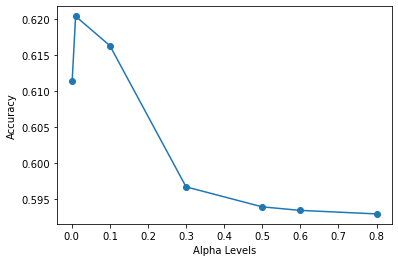

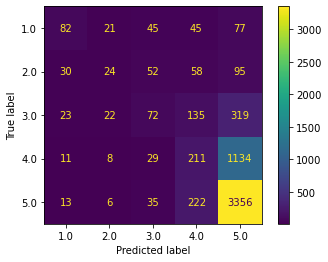

In [47]:
acc=[]
alphas = [0.8, 0.6, 0.5, 0.3, 0.1, 0.010, 0.0010]

for alpha in alphas:
    clf5 = MultinomialNB(alpha = alpha)
    clf5.fit(X_train, y_train)
    acc.append(clf5.score(X_test, y_test))


plt.plot(alphas, acc, '-o')
#plt.xscale('log')
plt.xlabel('Alpha Levels')
plt.ylabel('Accuracy')

y_pred3= clf5.predict(X_test)

print(classification_report(y_test, y_pred3))

plot_confusion_matrix(clf5, X_test, y_test)